In [41]:
import numpy as np
import os
import pandas as pd
import csv
from matplotlib import pyplot as plt
import matplotlib.pyplot as pyplot
import PIL.Image as Image
from PIL import ImageOps
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.vq import vq, kmeans, whiten
import glob
import math

In [210]:
#df = pd.read_table("C:/Users/titus/Documents/CS498/hw4/HMP_Dataset/Brush_teeth/*.txt", sep=" ", header=None)
#print(df)

Brush_teeth_path =r'C:/Users/titus/Documents/CS498/hw4/HMP_Dataset/Brush_teeth' # use your path
Climb_stairs_MODEL_path =r'C:/Users/titus/Documents/CS498/hw4/HMP_Dataset/Climb_stairs_MODEL'
Comb_hair_path =r'C:/Users/titus/Documents/CS498/hw4/HMP_Dataset/Comb_hair'
Descend_stairs_path =r'C:/Users/titus/Documents/CS498/hw4/HMP_Dataset/Descend_stairs'
Drink_glass_MODEL_path =r'C:/Users/titus/Documents/CS498/hw4/HMP_Dataset/Drink_glass_MODEL'
Eat_meat_path =r'C:/Users/titus/Documents/CS498/hw4/HMP_Dataset/Eat_meat'
Eat_soup_path =r'C:/Users/titus/Documents/CS498/hw4/HMP_Dataset/Eat_soup'
Getup_bed_MODEL_path =r'C:/Users/titus/Documents/CS498/hw4/HMP_Dataset/Getup_bed_MODEL'
liedown_bed_path =r'C:/Users/titus/Documents/CS498/hw4/HMP_Dataset/liedown_bed'
Pour_water_MODEL_path =r'C:/Users/titus/Documents/CS498/hw4/HMP_Dataset/Pour_water_MODEL'
Sitdown_chair_MODEL_path =r'C:/Users/titus/Documents/CS498/hw4/HMP_Dataset/Sitdown_chair_MODEL'
Standup_chair_MODEL_path =r'C:/Users/titus/Documents/CS498/hw4/HMP_Dataset/Standup_chair_MODEL'
Use_telephone_path =r'C:/Users/titus/Documents/CS498/hw4/HMP_Dataset/Use_telephone'
Walk_MODEL_path =r'C:/Users/titus/Documents/CS498/hw4/HMP_Dataset/Walk_MODEL'

path_list = [Brush_teeth_path, Climb_stairs_MODEL_path, Comb_hair_path, Descend_stairs_path, Drink_glass_MODEL_path, Eat_meat_path, Eat_soup_path, Getup_bed_MODEL_path, liedown_bed_path, Pour_water_MODEL_path, Sitdown_chair_MODEL_path, Standup_chair_MODEL_path, Use_telephone_path, Walk_MODEL_path]
#path_list = [Brush_teeth_path]
df_list = []
for path in path_list:
    allFiles = glob.glob(path + "/*.txt")
    a = False
    for file_ in allFiles: #take every sample of one action in one single df
        if a == False:
            frame = pd.read_csv(file_,sep=" ",index_col=None,  header=None)
            a = True
        else:
            df = pd.read_csv(file_,sep=" ",index_col=None,  header=None)
            frame = pd.concat([frame,df])
    newdf = frame.iloc[0:32,:]
    newnp = newdf.as_matrix()
    #print(newnp.size)

    #print(newnp.shape)
    #npreshape = pd.Panel(newdf.values.reshape(1,96))
    #print(newnp.size)
    #newnp = np.array(newnp,np.float32)
    vq_df = pd.DataFrame(np.array(newnp).resize((1,96)))
    #print(vq_df)                
    for i in range (1, math.floor(len(frame.index)/32)):
        newdf = frame.iloc[32*i:32*(i)+31, ]
        newnp = newdf.as_matrix()
        npreshape = pd.DataFrame(np.resize(newnp,(1,96)))

        vq_df = pd.concat([vq_df,npreshape])

    df_list.append(vq_df)



Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []


In [108]:
#count = 0  #we cut every sample in to samples of 32 row * 3 xzy coordinate system, so one row is 96 data
#newdf = df.loc[0:+31, ]
#newnp = newdf.as_matrix()
#npreshape = pd.DataFrame(np.reshape(newnp,(1,96)))
#vq_df = npreshape
#for i in range (1, math.floor(len(df.index)/32)):
#   newdf = df.loc[32*i:32*(i)+31, ]
#   newnp = newdf.as_matrix()
#   npreshape = pd.DataFrame(np.reshape(newnp,(1,96)))
#   vq_df = pd.concat([vq_df,npreshape])
#print(vq_df) 

    0   1   2   3   4   5   6   7   8   9  ...  86  87  88  89  90  91  92  \
0   57  11  36  11  36  35  11  37  35  12 ...  37  13  49  39  17  53  39   
0   24  51  38  25  49  38  26  48  40  29 ...  44  18  32  45  18  30  48   
0   17  30  47  17  30  49  17  32  47  18 ...  40  39  41  37  38  45  41   
0   36  47  48  33  52  45  32  51  46  29 ...  47  23  40  46  24  42  47   
0   23  38  49  22  38  48  23  38  51  19 ...  49  21  33  50  22  34  51   
0   22  32  49  21  34  51  21  32  50  20 ...  50  24  38  49  28  34  49   
0   24  34  45  15  41  62  22  32  47  21 ...  28  27  55  27  27  52  30   
0   27  53  30  27  51  31  26  52  31  26 ...  46  26  45  46  27  46  48   
0   27  44  48  28  47  47  28  45  48  27 ...  49  27  43  49  26  44  49   
0   27  45  48  26  44  49  27  44  48  28 ...  49  26  44  49  27  44  49   
0   26  43  49  27  44  48  26  43  48  26 ...  29  23  52  27  21  51  27   
0   20  51  24  22  48  22  23  47  22  23 ...  29  26  51  28  

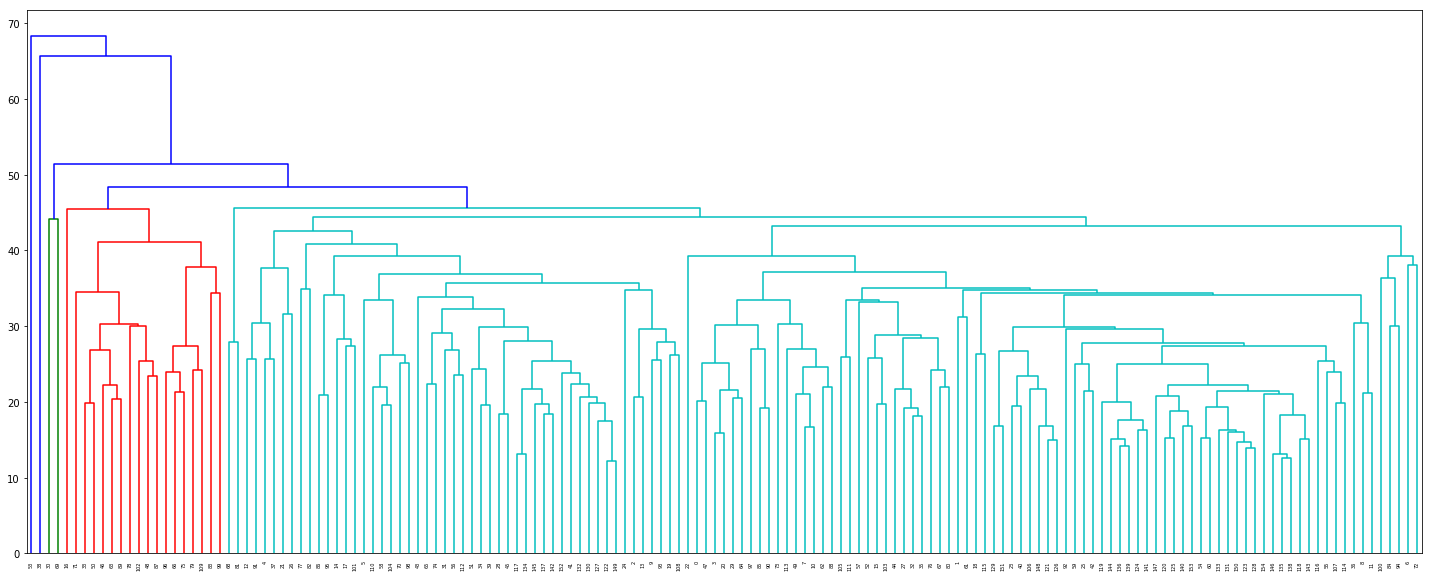

In [213]:
Z = linkage(df_list[1], 'average') #plot for Brush_teeth
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show() #show the Cluster all splits by hierarchical k-means

In [217]:
list_codebook = []
for dfa in df_list:
    whitened = whiten(dfa)
    codebook, distortion = kmeans(dfa.astype(float), 12)
    idx,_ = vq(whitened,codebook)

In [218]:
print(codebook) # do you get each of the codebook and train it on random forest? 

[[ 13.          38.81818182  32.90909091 ...,  13.          38.81818182
   32.90909091]
 [ 16.375       38.75        35.375      ...,  16.375       38.75        35.375     ]
 [  8.          35.          33.         ...,   8.          35.          33.        ]
 ..., 
 [ 12.66666667  35.          30.22222222 ...,  12.66666667  35.
   30.22222222]
 [ 15.          39.25        31.5        ...,  15.          39.25        31.5       ]
 [ 11.31578947  37.15789474  32.47368421 ...,  11.31578947  37.15789474
   32.47368421]]
